## Iris Dataset experimentation 
#### Objective : Building a basic machine learning model using K - Nearest Neighbours and perform data exploration using various visualizations

In [62]:
# Importing required libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
import seaborn as sns
import scipy as sp

In [5]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [11]:
print (iris_dataset['DESCR'][:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


In [28]:
# Importing train_test_split to split data into test and training sets.
# Splitting is done using a pseudo random number generator.
# Here the data is represented using X and label using y following the convention of f(X) = y.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

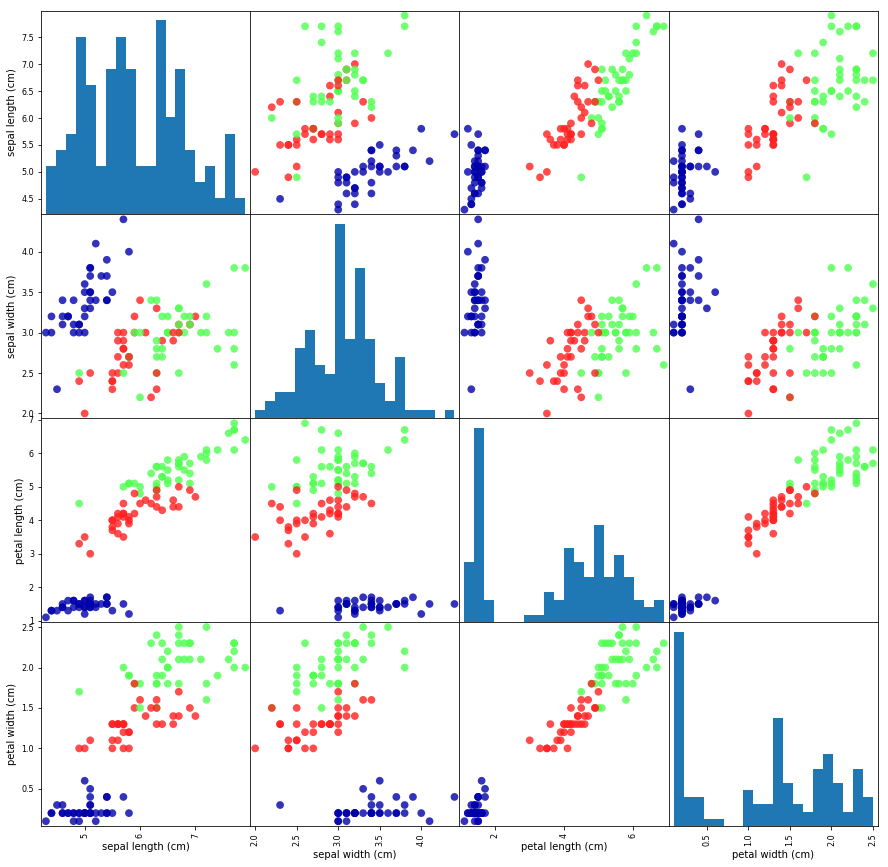

In [34]:
# Create dataframe from data in X_train.
# Label the columns using the strings in iris_dataset.features_names.
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

# Create a scatter matrix from the dataframe, color by y_train.
# Here we use scatter_matrix to compare all the features in pairs.
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', \
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Here the number of neighbours is critical in determining if the 
# The model will over or under fit. It is a hyperparameter.
# The knn object encapsulates the algorithm that will be used to build the model.
knn = KNeighborsClassifier(n_neighbors = 1)

In [41]:
# Fitting the data. The function returns the object again, modified in-place.

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [47]:
# Making predictions.

X_new = np.array([[5, 2.9, 1, 0.2]])

prediction = knn.predict(X_new)

print ("Prediction : {}".format(iris_dataset['target_names'][prediction]))

Prediction : ['setosa']


In [55]:
# Evaluation the model.

y_pred = knn.predict(X_test)

print ('Predictions : ',', '.join(iris_dataset['target_names'][y_pred]))

Predictions :  virginica, versicolor, setosa, virginica, setosa, virginica, setosa, versicolor, versicolor, versicolor, virginica, versicolor, versicolor, versicolor, versicolor, setosa, versicolor, versicolor, setosa, setosa, virginica, versicolor, setosa, setosa, virginica, setosa, setosa, versicolor, versicolor, setosa, virginica, versicolor, setosa, virginica, virginica, versicolor, setosa, virginica


In [61]:
# Measuring accuracy.

print ("Test score accuracy : {}".format(knn.score(X_test, y_test)))

Test score accuracy : 0.9736842105263158


### Data Exploration through Visualization

### Boxplots

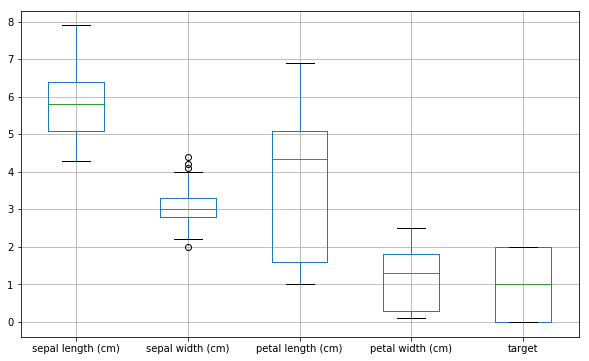

In [102]:
plt.figure(figsize = (10, 6))

# Converting the scikit-learn bunch object to a dataframe.
iris_df = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                       columns= iris_dataset['feature_names'] + ['target'])


iris_df.boxplot()

Text(0, 0.5, '(petal width) Values (in cm)')

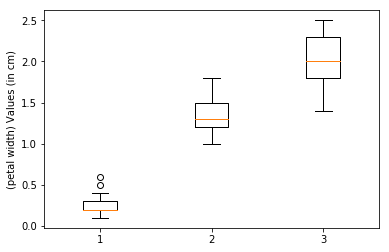

In [95]:
# Comparing specific features using boxplots
#iris_df.columns

pw_0 = iris_df[iris_df['target'] == 0]['petal width (cm)']
pw_1 = iris_df[iris_df['target'] == 1]['petal width (cm)']
pw_2 = iris_df[iris_df['target'] == 2]['petal width (cm)']

plt.boxplot([pw_0, pw_1, pw_2])
plt.ylabel('(petal width) Values (in cm)')


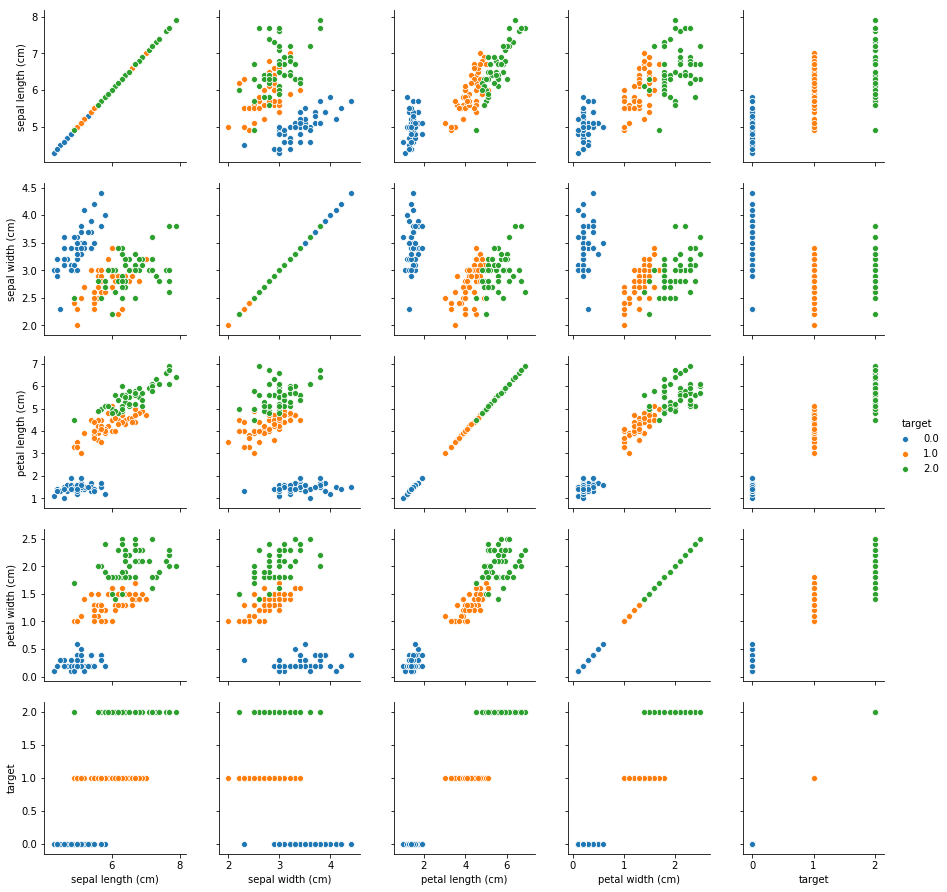

In [101]:
# Using seaborn to do a comparison similar to the scatter matrix above.

sns.pairplot(data = iris_df, hue = 'target', diag_kind=None)

### Heatmaps
#### Counter the problem of high density in scatter plots.

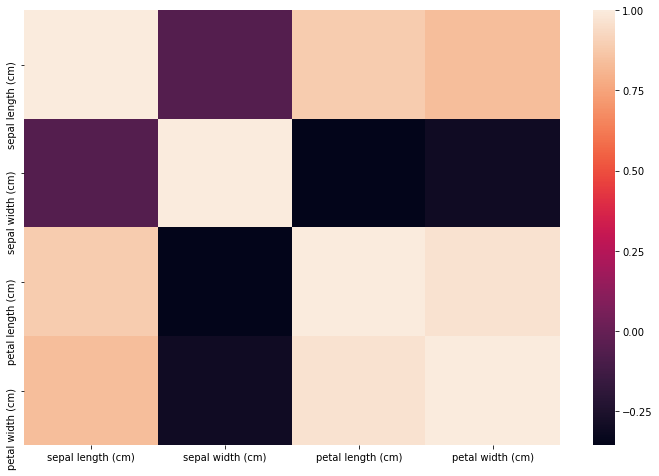

In [104]:
corr = iris_dataframe.corr()

fig, ax = plt.subplots(figsize=(12, 8))
# pass the axis to draw on
sns.heatmap(corr, ax=ax)

### Parallel Coordinates

C:\Users\Abhi\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


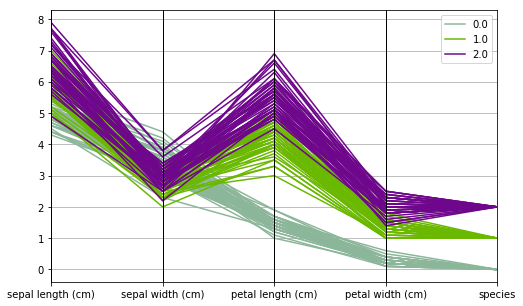

In [117]:
from pandas.tools.plotting import parallel_coordinates

plt.figure(figsize=(8, 5))

iris_df['species'] = iris_df['target']
parallel_coordinates(iris_df, 'target')

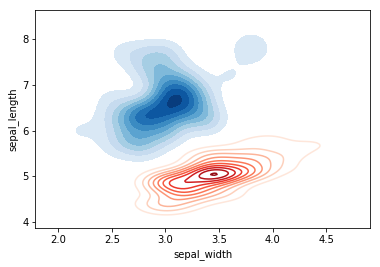

In [116]:
iris = sns.load_dataset("iris")

setosa = iris.loc[(iris.species == "setosa")]
virginica = iris.loc[(iris.species == "virginica")]

ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,cmap="Reds", shade=False, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,cmap="Blues", shade=True, shade_lowest=False)